In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
import pandas as pd
from bokeh.layouts import row, widgetbox, layout, gridplot
from bokeh.models import CustomJS, Slider
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models.glyphs import MultiLine
from bokeh.io import output_notebook
from bokeh.models.widgets import Div
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [2]:
num_data = 10
X = norm.rvs(size=(num_data,3), random_state=42)
#X = np.dot(Y, np.linalg.cholesky([[1, 0.6], [0.6, 0.6]]))
m = X.mean(axis=0)
X = X - m

In [3]:
X

array([[ 0.2448435 ,  0.34463606,  0.98109952],
       [ 1.2711592 ,  0.24874699,  0.09927402],
       [ 1.32734216,  1.25033509, -0.13606341],
       [ 0.29068939,  0.01948267, -0.13231877],
       [-0.00990838, -1.43037988, -1.39150685],
       [-0.81415818, -0.52993076,  0.64765831],
       [-1.15989473, -0.92940334,  1.79905975],
       [-0.47764695,  0.55042856, -1.09133721],
       [-0.79625338,  0.59382295, -0.8175826 ],
       [ 0.12382737, -0.11773833,  0.04171723]])

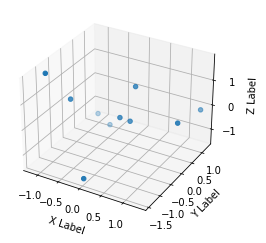

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
a, b = np.linalg.eig(np.cov(X.T));

In [6]:
a

array([0.34832021, 1.139166  , 0.78744362])

In [7]:
b

array([[ 0.66121255, -0.57561026,  0.48111412],
       [-0.74967543, -0.48303245,  0.45240071],
       [ 0.02801275,  0.65981246,  0.75090798]])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print(pca.components_)  
print(pca.explained_variance_) 

[[-0.57561026 -0.48303245  0.65981246]
 [-0.48111412 -0.45240071 -0.75090798]
 [ 0.66121255 -0.74967543  0.02801275]]
[1.139166   0.78744362 0.34832021]


In [9]:
X_star = pca.transform(X)

In [10]:
X_star

array([[ 0.33993686, -1.01042672, -0.06898829],
       [-0.7863429 , -0.79865162,  0.65680785],
       [-1.45776051, -1.10208444, -0.06350171],
       [-0.26404013, -0.04930952,  0.17389518],
       [-0.2215103 ,  1.69676554,  1.02678917],
       [ 1.15194458,  0.14511225, -0.12291284],
       [ 2.30362132, -0.37242386, -0.01978948],
       [-0.71101426,  0.80028224, -0.75904029],
       [-0.36795533,  0.72837212, -0.99456994],
       [ 0.01312068, -0.03763599,  0.17131036]])

In [11]:
# keep projections onto first two pcs
F_2 = np.dot(pca.components_[0:2,:], X.T)

In [12]:
np.dot(F_2, F_2.T)

array([[1.02524940e+01, 2.68361722e-15],
       [2.68361722e-15, 7.08699260e+00]])

In [13]:
# keep projection onto first pc
F_1 = np.dot(pca.components_[0,:], X.T)

In [14]:
F_1

array([ 0.33993686, -0.7863429 , -1.45776051, -0.26404013, -0.2215103 ,
        1.15194458,  2.30362132, -0.71101426, -0.36795533,  0.01312068])

In [15]:
X

array([[ 0.2448435 ,  0.34463606,  0.98109952],
       [ 1.2711592 ,  0.24874699,  0.09927402],
       [ 1.32734216,  1.25033509, -0.13606341],
       [ 0.29068939,  0.01948267, -0.13231877],
       [-0.00990838, -1.43037988, -1.39150685],
       [-0.81415818, -0.52993076,  0.64765831],
       [-1.15989473, -0.92940334,  1.79905975],
       [-0.47764695,  0.55042856, -1.09133721],
       [-0.79625338,  0.59382295, -0.8175826 ],
       [ 0.12382737, -0.11773833,  0.04171723]])

In [16]:
XF = np.outer(pca.components_[0,:].T, F_1)
XF

array([[-0.19567114,  0.45262704,  0.8391019 ,  0.15198421,  0.1275036 ,
        -0.66307111, -1.32598806,  0.4092671 ,  0.21179886, -0.0075524 ],
       [-0.16420053,  0.37982914,  0.70414563,  0.12753995,  0.10699666,
        -0.55642661, -1.11272385,  0.34344296,  0.17773436, -0.00633771],
       [ 0.22429458, -0.51883885, -0.96184855, -0.17421697, -0.14615526,
         0.76006739,  1.51995806, -0.46913607, -0.24278151,  0.00865719]])

In [17]:
resid = X.T - XF

In [18]:
resid

array([[ 0.44051464,  0.81853216,  0.48824026,  0.13870518, -0.13741198,
        -0.15108707,  0.16609333, -0.88691406, -1.00805224,  0.13137976],
       [ 0.50883659, -0.13108215,  0.54618946, -0.10805728, -1.53737655,
         0.02649585,  0.1833205 ,  0.2069856 ,  0.41608859, -0.11140062],
       [ 0.75680494,  0.61811287,  0.82578515,  0.0418982 , -1.2453516 ,
        -0.11240908,  0.27910169, -0.62220113, -0.57480108,  0.03306004]])

In [19]:
np.dot(resid, resid.T)

array([[ 3.01100859, -0.01141558,  2.61840057],
       [-0.01141558,  3.21231445,  2.34169749],
       [ 2.61840057,  2.34169749,  3.99855146]])

In [20]:
from sklearn.decomposition import PCA

class RiskModelPCA():
    
    ANN_FACTOR = 252
    
    def __init__(self, num_factors):
        self._num_factors = num_factors
        self.num_stocks_ = None
        self.factor_betas_ = None
        self.factor_returns_ = None
        self.common_returns_ = None
        self.residuals_ = None
        self.factor_cov_matrix_ = None
        self.idio_var_matrix_ = None
        self.explained_variance_ratio_ = None

    def fit(self, returns):
        self.num_stocks_ = len(returns.columns)
        mod = PCA(n_components=self._num_factors, svd_solver='full')
        mod.fit(returns)
        
        self.factor_betas_ = pd.DataFrame(
            data=mod.components_.T,
            index=returns.columns
        )
        
        self.factor_returns_ = pd.DataFrame(
            data=mod.transform(returns),
            index=returns.index
        )
        
        self.explained_variance_ratio_ = mod.explained_variance_ratio_
        
        self.common_returns_ = pd.DataFrame(
            data=np.dot(self.factor_returns_, self.factor_betas_.T),
            index=returns.index
        )
        self.common_returns_.columns = returns.columns
        
        self.residuals_ = (returns - self.common_returns_)
        
        self.factor_cov_matrix_ = np.diag(
            self.factor_returns_.var(axis=0, ddof=1)*RiskModelPCA.ANN_FACTOR
        )
        
        self.idio_var_matrix_ = pd.DataFrame(
            data=np.diag(np.var(self.residuals_))*RiskModelPCA.ANN_FACTOR,
            index=returns.columns
        )
        
        self.idio_var_vector_ = pd.DataFrame(
            data=np.diag(self.idio_var_matrix_.values),
            index=returns.columns
        )
        
        self.idio_var_matrix_.columns = index=returns.columns

    def get_factor_exposures(self, weights):
        F = self.factor_betas_.loc[weights.index]
        return F.T.dot(weights)

    def predict(self, weights):
        """ Calculates expected portfolio risk as sqrt(h'XFX'h + h'Sh).
            This will fail if your portfolio has asset weights not in the risk model"""
        all_assets = pd.DataFrame(
            data=np.repeat(0, self.num_stocks_),
            index=self.factor_betas_.index)
        all_assets.loc[weights.index] = weights
        
            
        h = all_assets
        X = self.factor_betas_
        F = self.factor_cov_matrix_
        S = self.idio_var_matrix_
        
        return np.sqrt(h.T.dot(X).dot(F).dot(X.T).dot(h) + h.T.dot(S).dot(h))[0].values[0]



In [21]:
rm = RiskModelPCA(1)
rm.fit(pd.DataFrame(X))

In [22]:
rm.idio_var_matrix_/252

,0,1,2
0,0.301101,0.000000,0.000000
1,0.000000,0.321231,0.000000
2,0.000000,0.000000,0.399855
